### 이상치 데이터 처리하기
- feature / 특성의 데이터 값 범위를 벗어나는 데이터
- 유형 
  * 잘못 입력된 데이터 : 입력 시 오타 발생된 경우 --> 제거 / 대체
  * 자연 생성 데이터   : 연봉, 신장, 몸무게 등, 나이, ...,  -->  분리하여 전용 모델 / 식별용 feature 생성

- 탐지
    * 시각화 -> 확인
    * 데이터 분포 확인 : Z - Score / IQR(사분위): Turkey Fences
- 처리
    * 삭제 / 대체 / 분리 모델 / 파생변수 추가

1. module loading <hr>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#임의의 데이터
dataDF = pd.DataFrame({'num': [1,4,2,3,4,5,-14,2,1,15,2]})


2. data preset

2 - 1. check data

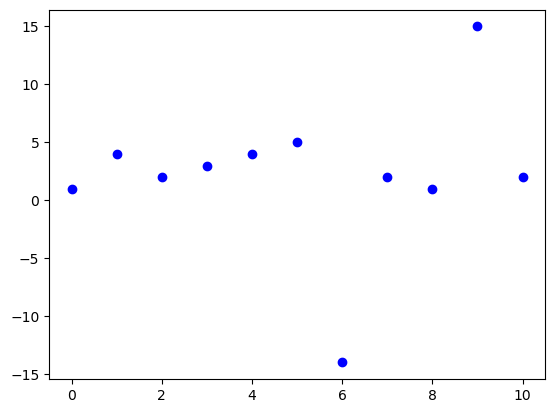

In [4]:
#visualize

plt.plot(dataDF, 'bo')


Text(0.5, 1.0, 'Histogram')

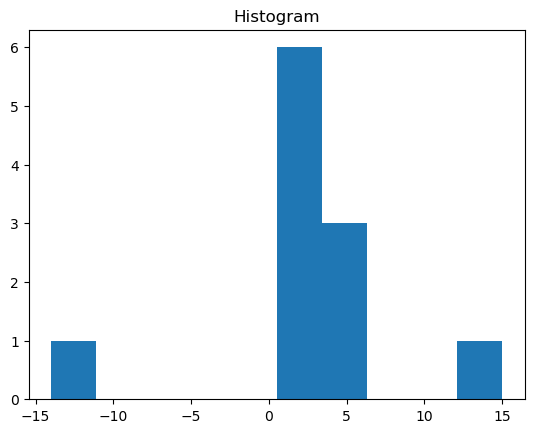

In [5]:
plt.hist(dataDF['num'])
plt.title('Histogram')

2 - 2. 불필요 데이터( 결측치, 이상치 등 ) 확인

In [8]:
# 결측치 확인
dataDF.isnull().sum()

# 이상치 탐지 : 1. 평균과 편차 이용 : Z - Score
# Z - Score ; (data - average) / 표준편차
mean_value = dataDF.mean()
std_value = dataDF.std() #표준편차

z_data = (dataDF  -  mean_value) / std_value

In [22]:
# 양 끝단 제거를 위한 기준값 : threthhold / 임의의 값 사용
# (여기서는) 기준값 = 1.0

hold = 1.0
mask = z_data.abs()>hold

NameError: name 'z_data' is not defined

In [ ]:
dataDF[~mask].dropna(inplace=True)

In [24]:
dataDF[~mask]

,num
0,1.0
1,4.0
2,2.0
3,3.0
4,4.0
5,5.0
6,NaN
7,2.0
8,1.0
9,NaN


In [29]:
# 이상치 탐지 방법 2: 데이터를 4등분하여 가운데 데이터를 기준으로 이상치 탐지
# pandas의 quantile
q1 = dataDF.quantile(0.25)
q3 = dataDF.quantile(0.75)
iqr = q3 - q1


#이상치 판단의 기준: boxplot 기준 상자 아래 = lower, 상자 위 = upper
lower= q1 - (iqr * 1.5)
upper= q3 + (iqr * 1.5)


print(f'q1 ; {q1}\n q3; {q3} \niqr = {iqr}')
print(f'lower = {lower}\nupper = {upper}')

q1 ; num    1.5
Name: 0.25, dtype: float64
 q3; num    4.0
Name: 0.75, dtype: float64 
iqr = num    2.5
dtype: float64
lower = num   -2.25
dtype: float64
upper = num    7.75
dtype: float64


In [33]:
#mask1 = dataDF<lower and dataDF>upper
dataDF 

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

{'whiskers': [<matplotlib.lines.Line2D at 0x1b1af07d910>,
 'caps': [<matplotlib.lines.Line2D at 0x1b1af2714f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b1af233760>],
 'medians': [<matplotlib.lines.Line2D at 0x1b1af032130>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b1af032dc0>],
 'means': []}

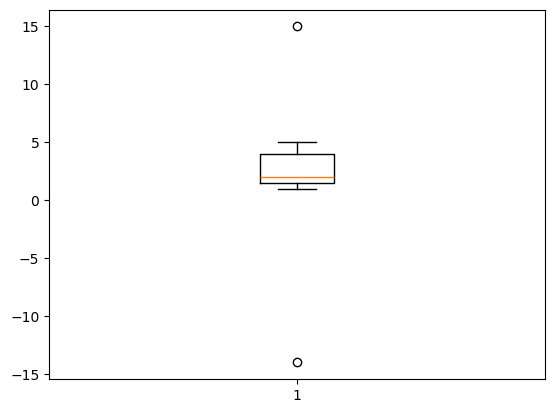

In [27]:
# 시각화
plt.boxplot(dataDF)

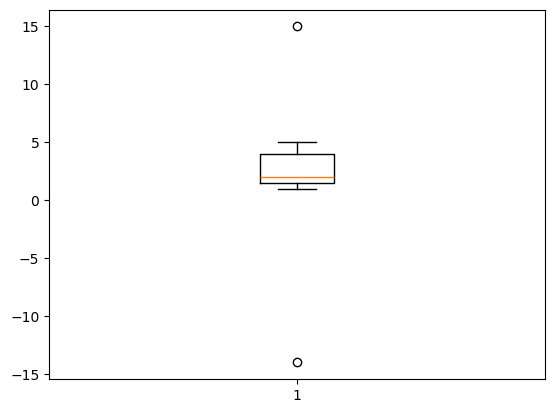

In [35]:
# 시각화
bp_obj = plt.boxplot(dataDF)

In [40]:
bp_obj['whiskers'][0].get_ydata()#1사분위 q1 min
bp_obj['whiskers'][1].get_ydata()#3사분위 q3 max

array([4., 5.])

In [38]:
bp_obj['medians'][0].get_ydata()

array([2., 2.])

In [39]:
bp_obj['boxes'][0].get_ydata()

array([1.5, 1.5, 4. , 4. , 1.5])